<a href="https://colab.research.google.com/github/Remyar12/CODSOFT/blob/main/Codsoft_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("/content/spam.csv", encoding='latin-1', engine = "python", usecols = ['v1','v2'])

In [3]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
data.shape

(5572, 2)

In [6]:
data.size

11144

In [8]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
data.columns = ["label", "message"]

In [10]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.isnull().values.any()

False

In [12]:
data.isnull().sum()

,0
label,0
message,0


In [13]:
data.duplicated().values.any()

True

In [14]:
data.duplicated().sum()

403

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


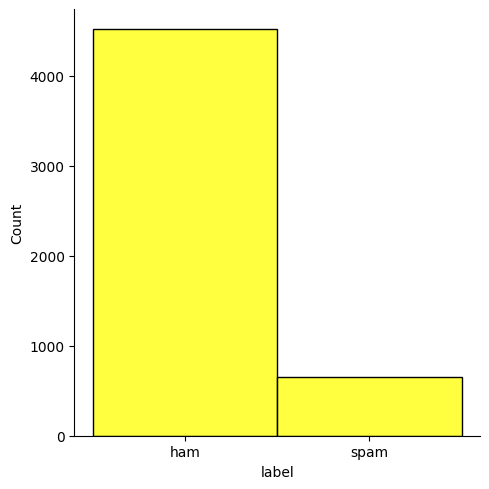

In [18]:
sns.displot(data.label, color = "yellow")

In [19]:
label = LabelEncoder()
data["label"] = label.fit_transform(data["label"].values)

In [ ]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(data["message"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
Y = data["label"]

In [24]:
Y.shape

(5169,)

In [25]:
X.shape

(5169, 8672)

In [26]:
data.count()

,0
label,5169
message,5169


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg_predict = log_reg.predict(X_test)

In [37]:
print("Logistic Regression Model is:")
print(confusion_matrix(Y_test, log_reg_predict))
print(classification_report(Y_test, log_reg_predict))
print("Accuracy is: ", accuracy_score(Y_test, log_reg_predict))
print("r2 Score is: ", r2_score(Y_test, log_reg_predict))
print("Precision score is: ", precision_score(Y_test, log_reg_predict))
print("Recall score is: ", recall_score(Y_test, log_reg_predict))
print("f1 score is: ", f1_score(Y_test, log_reg_predict))

Logistic Regression Model is:
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy is:  0.9555125725338491
r2 Score is:  0.6310150886311625
Precision score is:  0.9714285714285714
Recall score is:  0.7034482758620689
f1 score is:  0.8160000000000001


In [38]:
# Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, Y_train)
naive_bayes_predict = naive_bayes.predict(X_test)

In [39]:
print("Naive Bayes Model is:")
print(confusion_matrix(Y_test, naive_bayes_predict))
print(classification_report(Y_test, naive_bayes_predict))
print("Accuracy is: ", accuracy_score(Y_test, naive_bayes_predict))
print("r2 Score is: ", r2_score(Y_test, naive_bayes_predict))
print("Precision score is: ", precision_score(Y_test, naive_bayes_predict))
print("Recall score is: ", recall_score(Y_test, naive_bayes_predict))
print("f1 score is: ", f1_score(Y_test, naive_bayes_predict))

Naive Bayes Model is:
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy is:  0.9555125725338491
r2 Score is:  0.6310150886311625
Precision score is:  1.0
Recall score is:  0.6827586206896552
f1 score is:  0.8114754098360656


In [40]:
# Support Vector Machine(SVM) Model
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
svm_predict = svm.predict(X_test)

In [41]:
print("Support Vector Machine (SVM) Model is:")
print(confusion_matrix(Y_test, svm_predict))
print(classification_report(Y_test, svm_predict))
print("Accuracy is: ", accuracy_score(Y_test, svm_predict))
print("r2 Score is: ", r2_score(Y_test, svm_predict))
print("Precision score is: ", precision_score(Y_test, svm_predict))
print("Recall score is: ", recall_score(Y_test, svm_predict))
print("f1 score is: ", f1_score(Y_test, svm_predict))

Support Vector Machine (SVM) Model is:
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy is:  0.9835589941972921
r2 Score is:  0.8636360110158644
Precision score is:  0.9776119402985075
Recall score is:  0.903448275862069
f1 score is:  0.939068100358423
